# The Diabetes Data Set

We're working in this notebook on a model that can estimate a numerical value out of numerical features. We'll be first starting with a simple example to understand what regression is about, then getting into the practical case using the `diabetes`.

## Dummy example

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
size = 1000
X = 10*np.random.rand(size, 1)
y = 6 + 3*X + np.random.randn(size, 1) + X*np.cos(3*X)

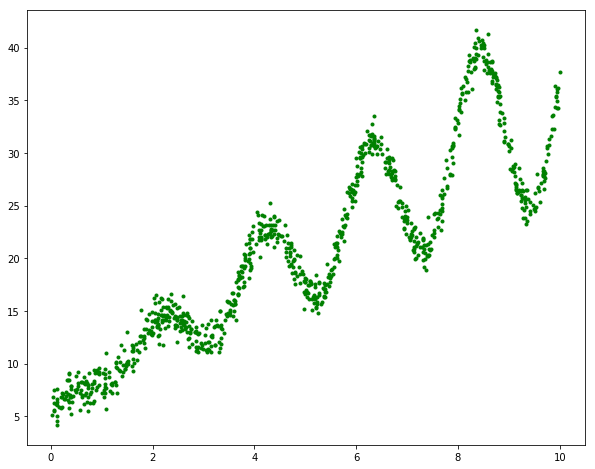

In [3]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(X, y, 'g.')

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
lin_reg = LinearRegression()

In [8]:
LinearRegression?

In [9]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
lin_reg.predict(2)

array([[12.3861492]])

There is nothing much behind the prediction for this simple model. It's only about multiplying the input by the linear coefficient and adding the intercept to it. 

In [11]:
lin_reg.coef_, lin_reg.intercept_

(array([[2.83920765]]), array([6.70773389]))

In [12]:
lin_reg.coef_*2 + lin_reg.intercept_

array([[12.3861492]])

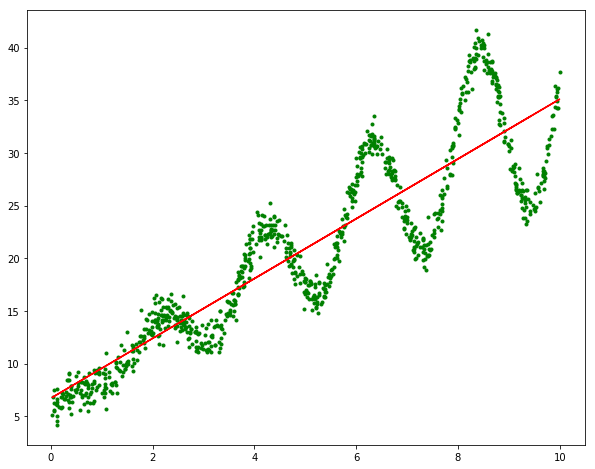

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(X, y, 'g.')
ax.plot(X, lin_reg.predict(X), 'r-')

### Evaluation

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
mean_squared_error?

In [16]:
mean_squared_error(y_test, lin_reg.predict(X_test))

15.779425871855814

In [17]:
def learning_curve(model, X, y, X_test, y_test, metric, min_index=0):
    max_index = X.shape[0]
    indexes = np.arange(min_index, max_index)
    scores_train, scores_test = [], []
    for i in range(min_index, max_index):
        X_i, y_i = X[:i], y[:i]
        model.fit(X_i, y_i)
        scores_train.append(metric(model.predict(X_i), y_i))
        scores_test.append(metric(model.predict(X_test), y_test))
    return indexes, scores_train, scores_test

In [18]:
inds, sc, sc_t = learning_curve(lin_reg, X_train, y_train, 
                                X_test, y_test, mean_squared_error, 10)

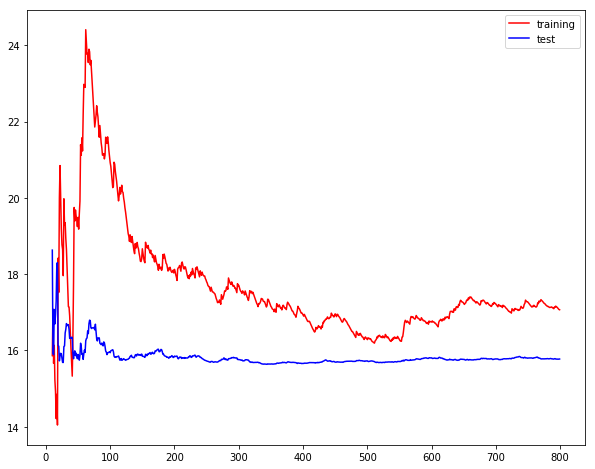

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(inds, sc, "r-", label="training")
ax.plot(inds, sc_t, "b-", label="test")
ax.legend()

### A Human Readable Score

The mean squared error is not always interpretable, it is mainly essential for the mathematical engine in the backend to build up the learning process (updating the model's parameters). A better fitted metric would be to look into success and failure of estimation up to a given accepted error. 

In [20]:
tols = np.linspace(0, 10, 20)
scores = []
for tol in tols:
    successes = np.logical_and(lin_reg.predict(X_test) <= y_test + tol, 
                               lin_reg.predict(X_test) >= y_test - tol)
    scores.append(np.sum(successes)/y_test.shape[0])

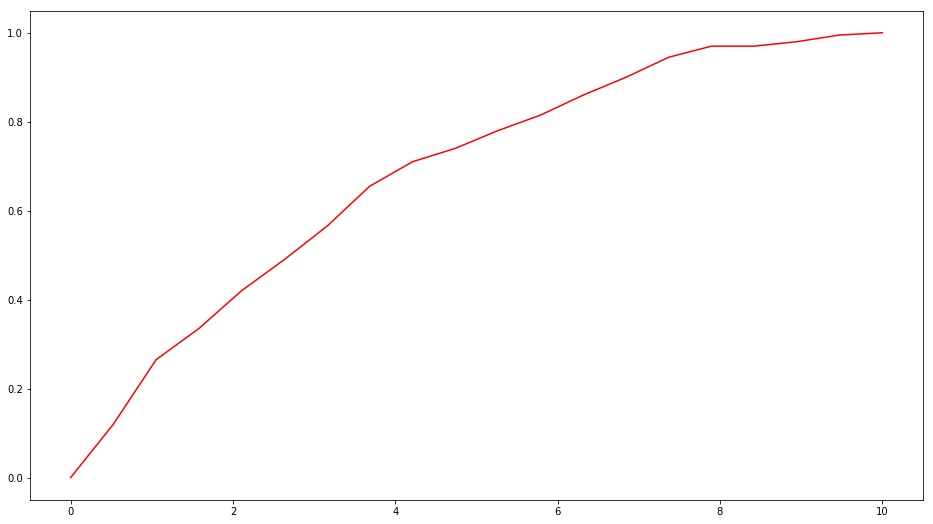

In [21]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(tols, scores, 'r-')

### Polynomial Regression

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [23]:
PolynomialFeatures?

In [24]:
p_deg = PolynomialFeatures(11)

In [25]:
t = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
t = p_deg.fit_transform(t)

In [26]:
t.shape

(5, 12)

In [27]:
p_deg.fit(X_train)
X_d_train = p_deg.transform(X_train)
X_d_test = p_deg.transform(X_test)
X_d_train.shape, X_d_test.shape

((800, 12), (200, 12))

In [28]:
poly_reg_d = LinearRegression()

In [29]:
LinearRegression?

In [30]:
poly_reg_d.fit(X_d_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
poly_reg_d.coef_, poly_reg_d.intercept_

(array([[ 0.00000000e+00, -2.22997589e+01,  6.45105733e+01,
         -7.56518575e+01,  4.88617232e+01, -1.88091856e+01,
          4.46382964e+00, -6.52506616e-01,  5.61273039e-02,
         -2.45581624e-03,  2.67998924e-05,  9.80871171e-07]]),
 array([8.66672822]))

In [32]:
mean_squared_error(y_test, poly_reg_d.predict(X_d_test))

10.871888577482803

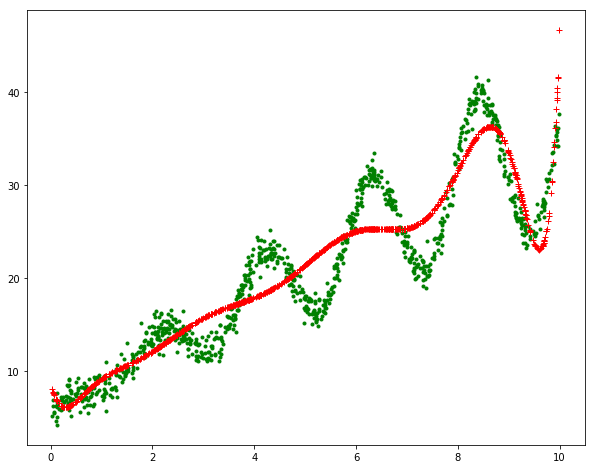

In [33]:
X_d = p_deg.fit_transform(X)
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(X, y, 'g.')
ax.plot(X, poly_reg_d.predict(X_d), 'r+')

In [34]:
inds, sc, sc_t = learning_curve(poly_reg_d, X_d_train, y_train, 
                                X_d_test, y_test, mean_squared_error, 100)

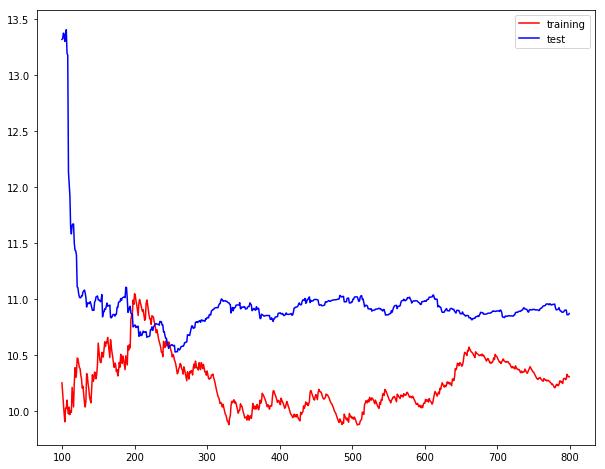

In [35]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(inds, sc, "r-", label="training")
ax.plot(inds, sc_t, "b-", label="test")
ax.legend()

In [36]:
tols = np.linspace(0, 10, 20)
scores = []
for tol in tols:
    successes = np.logical_and(poly_reg_d.predict(X_d_test) <= y_test + tol, 
                               poly_reg_d.predict(X_d_test) >= y_test - tol)
    scores.append(np.sum(successes)/y_test.shape[0])

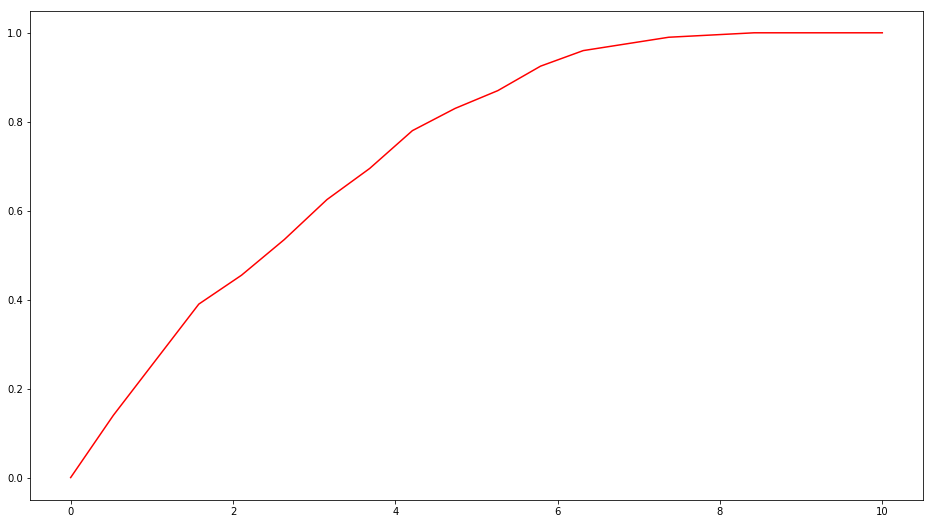

In [37]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(tols, scores, 'r-')

### Choosing the Best Polynomial Regression

This is mainly about choosing the polynomial that gives us the best training score / test score trade-off. 

In [38]:
degrees = np.arange(1, 31)
tol = 3
poly_models = []
scores_train, scores_test = [], []
for degree in degrees:
    ## Fitting model for degree d polynomial regression
    poly_f = PolynomialFeatures(degree)
    poly_f.fit(X_train)
    X_d_train, X_d_test = poly_f.transform(X_train), poly_f.transform(X_test) 
    poly_model = LinearRegression()
    poly_model.fit(X_d_train, y_train)
    poly_models.append(poly_model)
    ## Computing score of model
    predict_training, predict_test = poly_model.predict(X_d_train), poly_model.predict(X_d_test)
    success_train = np.logical_and(predict_training <= y_train + tol,
                                   predict_training >= y_train - tol) 
    success_test =  np.logical_and(predict_test <= y_test + tol,
                                   predict_test >= y_test - tol) 
    score_train = np.sum(success_train)/y_train.shape[0]
    score_test = np.sum(success_test)/y_test.shape[0]
    scores_train.append(score_train)
    scores_test.append(score_test)

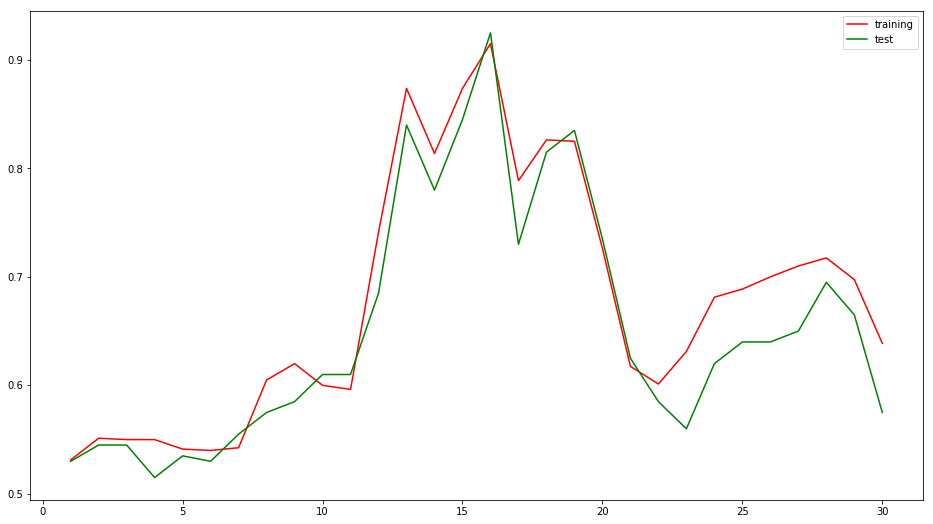

In [39]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(degrees.flatten(), scores_train, 'r-', label="training")
ax.plot(degrees.flatten(), scores_test, 'g-', label="test")
ax.legend()

## Taking Things Into Medical Data Sets

In [40]:
from sklearn import datasets

In [41]:
diabetes = datasets.load_diabetes()

In [42]:
print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [55]:
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names'])

In [63]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [64]:
diabetes.target.shape

(442,)

In [44]:
diabetes.data[:20, 1]

array([ 0.05068012, -0.04464164,  0.05068012, -0.04464164, -0.04464164,
       -0.04464164,  0.05068012,  0.05068012,  0.05068012, -0.04464164,
       -0.04464164,  0.05068012, -0.04464164,  0.05068012, -0.04464164,
        0.05068012, -0.04464164,  0.05068012, -0.04464164, -0.04464164])

Here the `sex` feature is a categorical variable. Our aim is to use regression to estimate the `target` (which is a numerical output). We shall drop the `sex` feautre in our example. 

Another strategy would be to seperate the dataset in two, each corresponding to one gender.

In [46]:
A = np.array([[1, 2, 3, 4], [-1, -2, -3, -4]])
A

array([[ 1,  2,  3,  4],
       [-1, -2, -3, -4]])

In [48]:
np.delete?

In [50]:
np.delete(A, 1, 1)

array([[ 1,  3,  4],
       [-1, -3, -4]])

In [51]:
A[:, np.arange(0, A.shape[1]) != 1]

array([[ 1,  3,  4],
       [-1, -3, -4]])

In [52]:
X, y = np.delete(diabetes.data, 1, 1), diabetes.target

In [53]:
X[:10, :10]

array([[ 0.03807591,  0.06169621,  0.02187235, -0.0442235 , -0.03482076,
        -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.05147406, -0.02632783, -0.00844872, -0.01916334,
         0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.04445121, -0.00567061, -0.04559945, -0.03419447,
        -0.03235593, -0.00259226,  0.00286377, -0.02593034],
       [-0.08906294, -0.01159501, -0.03665645,  0.01219057,  0.02499059,
        -0.03603757,  0.03430886,  0.02269202, -0.00936191],
       [ 0.00538306, -0.03638469,  0.02187235,  0.00393485,  0.01559614,
         0.00814208, -0.00259226, -0.03199144, -0.04664087],
       [-0.09269548, -0.04069594, -0.01944209, -0.06899065, -0.07928784,
         0.04127682, -0.0763945 , -0.04118039, -0.09634616],
       [-0.04547248, -0.04716281, -0.01599922, -0.04009564, -0.02480001,
         0.00077881, -0.03949338, -0.06291295, -0.03835666],
       [ 0.06350368, -0.00189471,  0.06662967,  0.09061988,  0

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

To ease work we're going to wrap our scripts into a single function.

In [66]:
def poly_reg(X, y, d):
    """Returns a fitted polynomial model of degree d."""
    ## Transform input into proper sized one for regression
    poly_d = PolynomialFeatures(d)
    poly_d.fit(X)
    X_d = poly_d.transform(X)
    
    ## Fitting regression model onto the input data
    poly_reg_d = LinearRegression()
    poly_reg_d.fit(X_d, y)
    
    return poly_reg_d, poly_d, X_d

Writing down a function computing accuracy score of models with respect to a given tolerance on estimation error.

In [65]:
def accuracy_s(y_predict, y_true, tol=0.01):
    """Computes accuracy score with respect to a given tolerance on estimation error."""
    success = np.logical_and(y_predict <= y_true + tol,
                             y_predict >= y_true - tol)
    return np.sum(success) / y_true.shape[0] 

We can still wrap these two functions to output accuracy score of a degree d regression model.

In [67]:
def reg_d_accuracy(X_train, X_test, y_train, y_test, d, tol=0.01):
    """Computes accuracy scores on training and test sets of poly regression of degree d."""
    
    ## Fitting regression model of degree d on training set
    poly_reg_d, poly_d, X_train_d = poly_reg(X_train, y_train, d)
    ## Evaluating previous model on training and test sets
    X_test_d = poly_d.transform(X_test)
    y_predict_train = poly_reg_d.predict(X_train)
    y_predict_test = poly_reg_d.predict(X_test)
    ## Computing test secores on both training and test sets
    success_train = accuracy_s(y_predict_train, y_train, tol)
    success_test = accuracy_s(y_predict_test, y_test, tol)
    return success_train, success_test